In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/Users/prince00raj/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df= pd.read_csv("Wine.csv")

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1598.000000,1599.000000,1598.000000,1599.000000,1599.000000,1598.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.433041,0.996747,3.498586,0.658149,10.422983,5.636421
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.876249,0.001887,0.080346,0.169507,1.065668,0.807665
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.520000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.520000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.520000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,3.900000,2.000000,14.900000,8.000000


In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      1
sulphates               0
alcohol                 0
quality                 1
dtype: int64

In [7]:
df[df['total sulfur dioxide'].isna() | df['pH'].isna() | df['quality'].isna()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
9,7.5,0.50,0.36,6.1,0.071,17.0,NaN,0.9978,3.35,0.80,10.5,5.0
123,8.0,0.71,0.00,2.6,0.080,11.0,34.0,0.9976,3.44,0.53,9.5,NaN
184,6.7,0.62,0.21,1.9,0.079,8.0,62.0,0.9970,NaN,0.58,9.3,6.0


In [8]:
df.dropna(inplace = True)

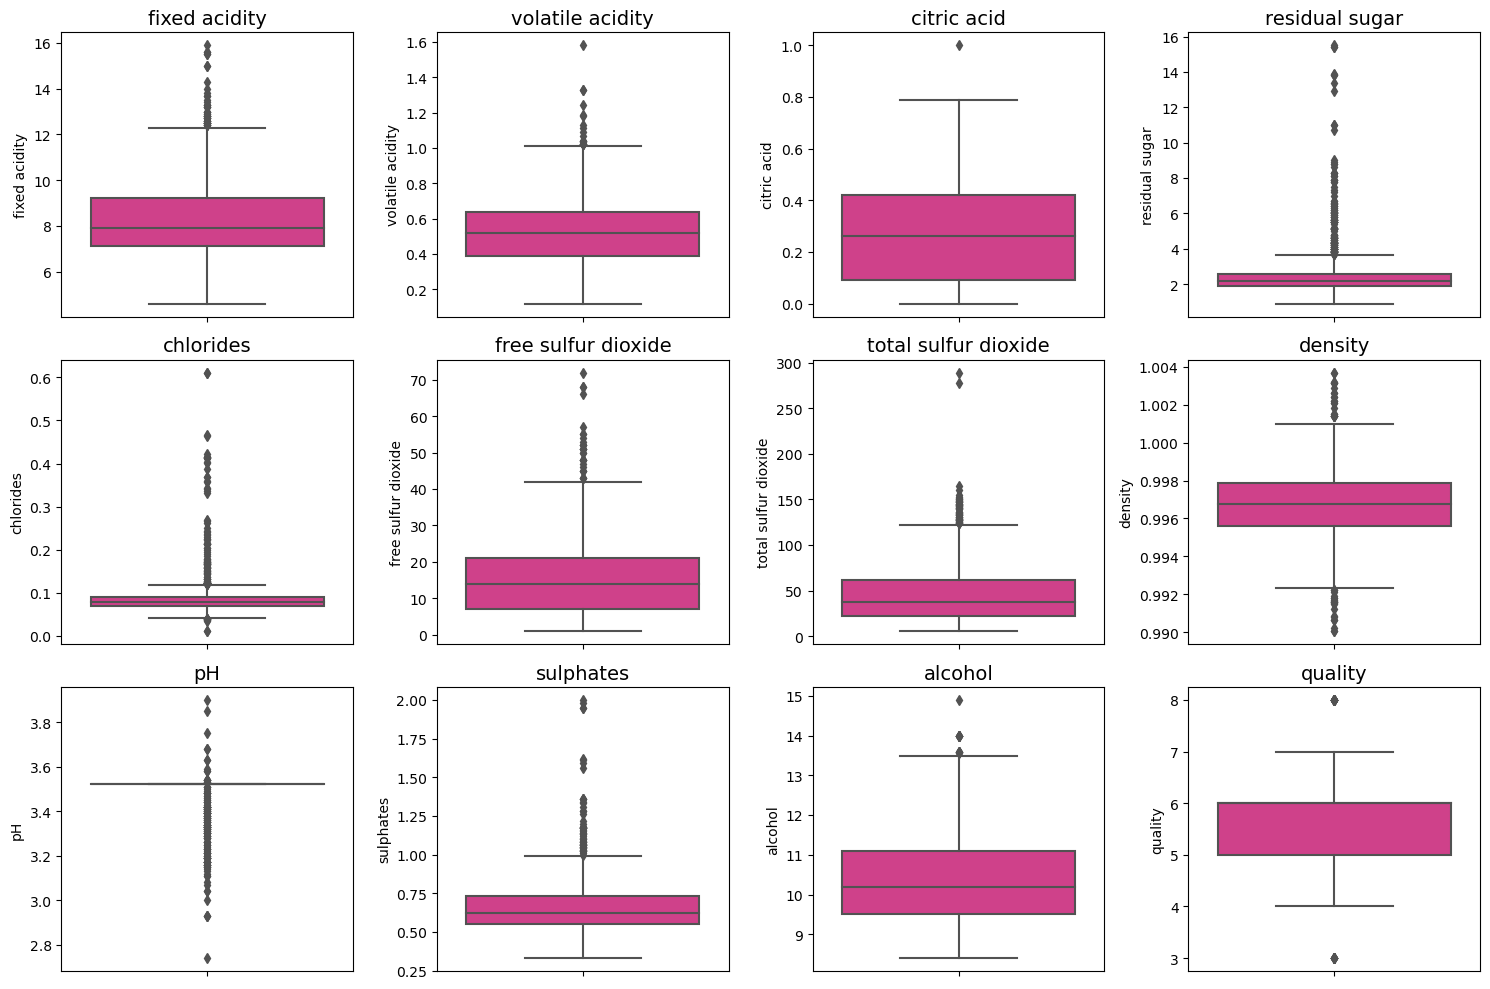

In [9]:
# Identifying outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=df[column], color ='#e7298a')
    plt.title(column, fontsize=14)
    plt.xlabel("")
plt.tight_layout()
plt.show()

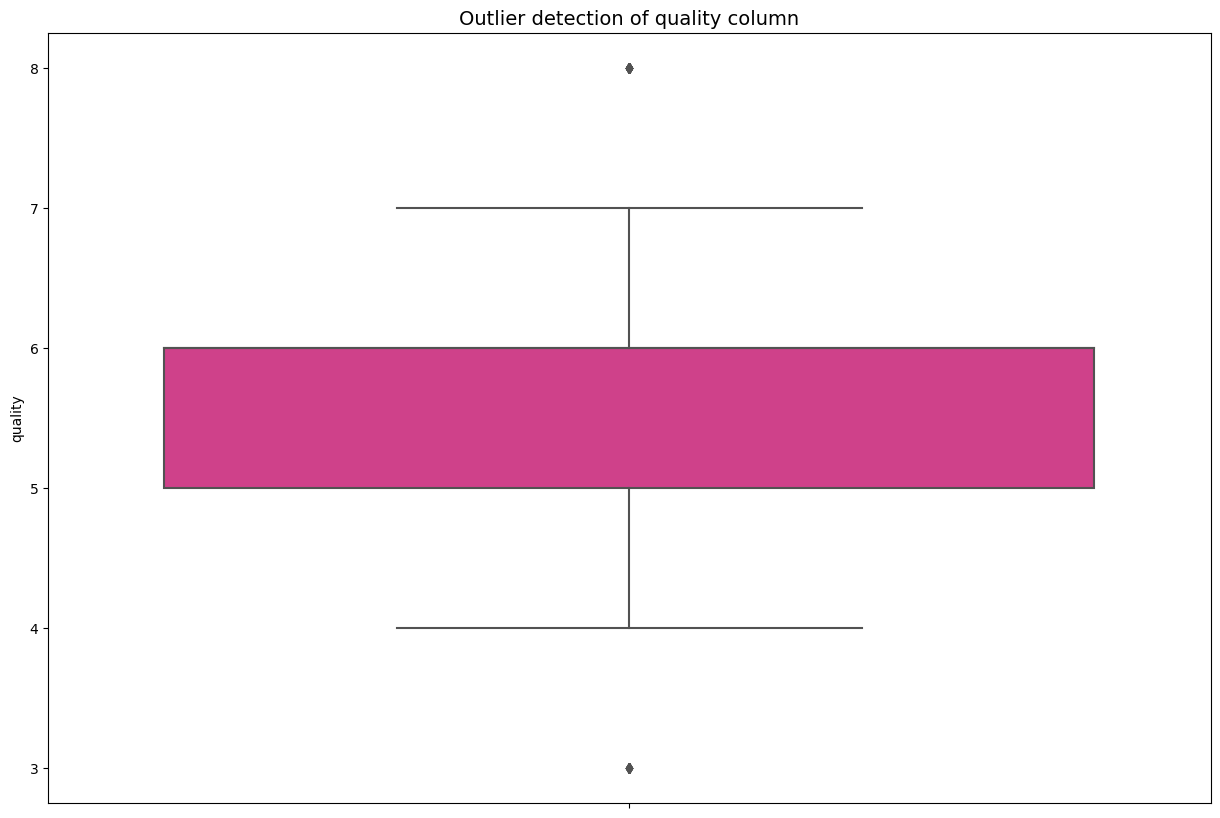

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

data = df['quality']
 
plt.figure(figsize =(15, 10))
sns.boxplot(y=data, color ='#e7298a')
plt.title("Outlier detection of quality column", fontsize=14)
plt.xlabel("")

# show plot
plt.show()

# BY USING LINEAR REGRESSION

In [11]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

#feature columns and target columns
features = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol']]
target = df['quality']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1276, 11)
(320, 11)
(1276,)
(320,)


In [14]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

In [16]:
y_pred = model.predict(x_test)

In [17]:
metrics(y_test, y_test)

RMSE: 0.0
R_Squared value: 1.0


In [18]:
accuracy(y_test, y_pred)

90.57526289975758

In [19]:
y_pred

array([5.73590265, 5.85030339, 5.29467602, 5.56872508, 5.52389924,
       5.32532757, 5.30511318, 5.96247286, 6.07523463, 5.58018773,
       5.4138166 , 5.3490287 , 5.12678558, 5.21458613, 5.63068731,
       5.36881427, 5.35462281, 5.44579259, 5.09091194, 5.33509769,
       5.54414843, 6.22903618, 6.01319684, 5.29417631, 5.07941196,
       5.12769878, 6.15212255, 6.01701491, 5.25181954, 6.23784983,
       6.25068155, 5.09503561, 5.82671155, 5.50625016, 6.0802362 ,
       5.20959074, 5.36243344, 5.46524945, 5.43575954, 4.95769684,
       6.10802087, 5.45159491, 5.59684455, 5.13191138, 5.8641166 ,
       5.38575454, 5.14066526, 5.38114748, 4.36161105, 6.1849637 ,
       5.55184294, 5.62219809, 4.86039741, 6.91168708, 5.77082075,
       4.98993888, 6.48434004, 4.88698121, 5.13037481, 5.37944726,
       5.2703451 , 5.34050213, 5.16984655, 5.43708946, 5.26664594,
       5.06203879, 5.79767232, 5.77718557, 6.12752532, 5.93302363,
       5.68472214, 5.843775  , 6.19704068, 6.16784727, 5.35902

-----------

----------

By- Chandra Mohan Singh